### Overview  <a name='objectives' />

This notebook introduces you to Basic Probability. 

The topics that will be covered are:

*  <a href=#joint_marg_cond>Understand joint, marginal and conditional probabilities</a>
*  <a href=#sum_prod_rule>Sum and product rules</a>
*  <a href=#bayes_rule>Bayes rule</a>
*  <a href=#cond_idependence>Conditional Independence</a>
*  <a href=#mass_function>Probability mass function</a>
*  <a href=#density_function>Probability density function</a>

You will need to implement code between the comments:

`# Your code starts here` and `# Your code ends here`


In [0]:
# Make sure that the required libraries are installed
# If you are using Google Colab, remember to upload the requirements file before 
# running this cell
# If you are running this notebook locally, the requirements file needs to be in 
# the same location as this notebook
import sys
!{sys.executable} -m pip install -r requirements_week03.txt

### Understanding Joint, Marginal and Conditional Probability <a name='joint_marg_cond' />

<img src=https://slideplayer.com/slide/13550085/82/images/12/Marginal%2C+Joint%2C+Conditional.jpg width="600">

<a href=#objectives> [go to top] </a>


In [0]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Counter for figures
figcount = 0

# Set the random seed for reproducing results
random_seed = 100
np.random.seed(random_seed)

In [0]:
def calc_freq(throws, coin_prob, die_prob):
    """
    Function that simulates a certain number (throws) of coin tosses and dice 
    throws and returns the frequencies of the discrete events
    """

    die = np.random.choice(a=[1,2,3,4,5,6], size=throws, replace=True, p=die_prob)
    coin = np.random.choice(a=[1,2], size=throws, replace=True, p=coin_prob)  # Heads=1, Tails=2

    # Initialize array for storing results
    frequencies = np.zeros((2,6))

    for i in range(throws):
        d = die[i]
        c = coin[i]

        frequencies[c-1,d-1] += 1

    return frequencies

In [0]:
# Lets simulate coin tosses and die throws to see what the frequencies look like

# Both the coin and die are biased
f = calc_freq(throws=10000, coin_prob=[0.2,0.8], die_prob=[0.05, 0.15, 0.3, 0.3, 0.15, 0.05])

In [0]:
# Shape of our frequency table
print(f.shape)

# Contents of the frequency table
print(f)

(2, 6)
[[  82.  291.  593.  619.  280.   98.]
 [ 419. 1220. 2434. 2350. 1198.  416.]]


In [0]:
# We are using pandas only for formatting
import pandas as pd

df = pd.DataFrame(f)
df.columns = ['1', '2', '3', '4', '5', '6']
df.index = ['1', '2']

# Total sum per column (we sum the rows for each column): 
df.loc['Total',:]= df.sum(axis=0)

# Total sum per row (we sum the columns for each row): 
df.loc[:,'Total'] = df.sum(axis=1)

df

,1,2,3,4,5,6,Total
1,82.0,291.0,593.0,619.0,280.0,98.0,1963.0
2,419.0,1220.0,2434.0,2350.0,1198.0,416.0,8037.0
Total,501.0,1511.0,3027.0,2969.0,1478.0,514.0,10000.0


In [0]:
# Implement the four functions in this block

def calc_discrete_joint_prob(frequencies, coin_face, die_value):
    """
    Function to calculate the joint probability of the given coin face and die
    value
    
    :param: frequencies: counts of the discrete events as a numpy array
    :param: coin_face: 1 for heads or 2 for tails
    :param: die_value: can be any number from 1-6
    
    :returns: scalar number representing the joint probability 
              P(coin=coin_face, die=die_value)
    """
    # Make sure we get correct inputs
    assert coin_face in [1,2], 'coin_face value must be 1 or 2'
    assert die_value in [1,2,3,4,5,6], 'die_value value must be between 1-6'
    
    return frequencies[coin_face-1][die_value-1]/np.sum(frequencies)


def calc_discrete_marginal_prob(frequencies, variable, value):
    """
    Function to calculate the marginal probability P(variable=value)
    :param: frequencies: counts of the discrete events as a numpy array
    :param: variable: 'c' for coin or 'd' for die
    :param: value: Value for the variable (1,2 for coin or 1-6 for die)
    
    :returns: scalar probability
    
    """
    assert variable in ['c','d'], 'variable must be \'c\' for coin or \'d\' for die'
    if variable=='c':  # coin
        assert value in [1,2], 'coin_face value must be 1 or 2'
        return (np.sum(frequencies,axis=1)/np.sum(frequencies))[value-1]
        
    else: # die
        assert value in [1,2,3,4,5,6], 'die_value value must be between 1-6'
        return (np.sum(frequencies,axis=0)/np.sum(frequencies))[value-1]
    

def calc_discrete_coin_cond_prob(frequencies, coin_face, die_value):
    """
    Function to calculate the conditional probability P(coin=coin_face|die=die_value)
    :param: frequencies: counts of the discrete events as a numpy array
    :param: coin_face: 1 for heads or 2 for tails
    :param: die_value: can be any number from 1-6
    
    :returns: scalar probability
    """
    # Make sure we get correct inputs
    assert coin_face in [1,2], 'coin_face value must be 1 or 2'
    assert die_value in [1,2,3,4,5,6], 'die_value value must be between 1-6'

    return frequencies[coin_face-1][die_value-1]/(np.sum(frequencies, axis=0)[die_value-1])


def calc_discrete_die_cond_prob(frequencies, coin_face, die_value):
    """
    Function to calculate the conditional probability P(die=die_value|coin=coin_face)
    :param: frequencies: counts of the discrete events as a numpy array
    :param: coin_face: 1 for heads or 2 for tails
    :param: die_value: can be any number from 1-6
    
    :returns: scalar probability
    """
    # Make sure we get correct inputs
    assert coin_face in [1,2], 'coin_face value must be 1 or 2'
    assert die_value in [1,2,3,4,5,6], 'die_value value must be between 1-6'

    return frequencies[coin_face-1][die_value-1]/(np.sum(frequencies, axis=1)[coin_face-1])


#### Calculate the following probabibilities by hand and then verify your code



1.   $p(c=1)$
2.   $p(c=2)$
3.   $p(d=1)$
4.   $p(d=5)$
5.   $p(c=2,d=6)$
6.   $p(c=2 \vert d=6)$
7.   $p(d=6 \vert c=2)$



In [0]:
# Print the frequency table for reference
print(df)

# Test marginal probabilities
print('Test marginal probabilities')
print('p(c=1):{}'.format(calc_discrete_marginal_prob(f, variable='c', value=1)))
print('p(c=2):{}'.format(calc_discrete_marginal_prob(f, variable='c', value=2)))

print('p(d=1):{}'.format(calc_discrete_marginal_prob(f, variable='d', value=1)))
print('p(d=5):{}'.format(calc_discrete_marginal_prob(f, variable='d', value=5)))

# Test joint probabilities
print('Test joint probabilities')
print('p(c=2,d=6):{}'.format(calc_discrete_joint_prob(f, coin_face=2, die_value=6)))

# Test conditional probabilities
print('Test conditional probabilities')
print('p(c=2|d=6):{}'.format(calc_discrete_coin_cond_prob(f, coin_face=2, die_value=6)))
print('p(d=6|c=2):{}'.format(calc_discrete_die_cond_prob(f, coin_face=2, die_value=6)))

           1       2       3       4       5      6    Total
1       82.0   291.0   593.0   619.0   280.0   98.0   1963.0
2      419.0  1220.0  2434.0  2350.0  1198.0  416.0   8037.0
Total  501.0  1511.0  3027.0  2969.0  1478.0  514.0  10000.0
Test marginal probabilities
p(c=1):0.1963
p(c=2):0.8037
p(d=1):0.0501
p(d=5):0.1478
Test joint probabilities
p(c=2,d=6):0.0416
Test conditional probabilities
p(c=2|d=6):0.8093385214007782
p(d=6|c=2):0.05176060719173821


### Sum and Product Rule <a name='sum_prod_rule' />

Sum rule: $p(X) = \sum\limits_{Y}p(X,Y)$

Product rule: $p(X,Y) = p(Y|X)p(X)$


Use the functions that you wrote to verify the sum and the product rules.

<a href=#objectives> [go to top] </a>

Verify the sum rule for $p(d=5)$

In [0]:
# Verify the sum rule
# X is die, Y is coin

# p(X)
print(calc_discrete_marginal_prob(f, variable='d', value=5))

# sum_Y p(X,Y)
cumulative = 0
for c in [1,2]:
    cumulative += calc_discrete_joint_prob(f, coin_face=c, die_value=5)
print(cumulative)


0.1478
0.14780000000000001


Verify the product rule for $p(c=2,d=5)$

In [0]:
# Verify the product rule
# X is die, Y is coin

# p(X,Y)
print(calc_discrete_joint_prob(f, coin_face=2, die_value=5))

# p(Y|X)*p(X)
print(calc_discrete_coin_cond_prob(f, coin_face=2, die_value=5)*calc_discrete_marginal_prob(f, variable='d', value=5))

0.1198
0.11979999999999998


### Bayes Rule<a name='bayes_rule' />

Bayes rule is stated as

$$
\begin{align}
p(Y|X) = \frac{p(X|Y)p(Y)}{p(X)} &= \frac{p(X|Y)p(Y)}{\sum\limits_{Y}p(X|Y)p(Y)} \text{ (for the discrete case)} 
\end{align}
$$

Proof:
$$
\begin{align}
&p(X,Y) = p(Y,X) \\
&\Rightarrow p(Y|X)p(X) = p(X|Y)p(Y) \text{ (from the product rule)}\\ 
&\Rightarrow p(Y|X) = \frac{p(X|Y)p(Y)}{p(X)}\\
&\Rightarrow p(Y|X) = \frac{p(X|Y)p(Y)}{\sum\limits_{Y}p(X,Y)} \text{ (from the sum rule)}\\
&\Rightarrow p(Y|X) = \frac{p(X|Y)p(Y)}{\sum\limits_{Y}p(X \vert Y)p(Y)} \text{ (from the product rule)}
\end{align}
$$

<a href=#objectives> [go to top] </a>

In [0]:
# Verify Bayes' rule
# X is die, Y is coin

coin_face = 1
die_value = 3

# Calculate p(Y|X)
p_y_given_x = calc_discrete_coin_cond_prob(f, coin_face=coin_face, die_value=die_value)
print(p_y_given_x)

# Calculate p(X|Y), p(Y) and p(X)
p_x_given_y = calc_discrete_die_cond_prob(f, coin_face=coin_face, die_value=die_value)
p_y = calc_discrete_marginal_prob(f, variable='c', value=coin_face)
p_x = calc_discrete_marginal_prob(f, variable='d', value=die_value)
print(p_x_given_y*p_y/p_x)


0.19590353485298975
0.19590353485298972


### Conditional Independence<a name='cond_idependence' />

$Y$ is conditionally independent of $X$ if $p(Y \vert X) = p(Y)$. Intuitively, $Y$ is independent of $X$ if knowing about $X$ gives no extra information about $Y$.

<a href=#objectives> [go to top] </a>

In [0]:
# X is die, Y is coin

die_value = 3
coin_face = 1

# Is p(Y|X) = p(Y)
p_y_given_x = calc_discrete_coin_cond_prob(f, coin_face=coin_face, die_value=die_value)
p_y = calc_discrete_marginal_prob(f, variable='c', value=coin_face)
print(p_y_given_x)
print(p_y)



0.19590353485298975
0.1963


In [0]:
# Coin face is completely dependent on the die throw
def calc_freq2(throws, die_prob):
    """
    Function that simulates a certain number (throws) of coin tosses and die 
    throws and returns the frequencies of the discrete events
    """

    die = np.random.choice(a=[1,2,3,4,5,6], size=throws, replace=True, p=die_prob)
    coin = die%2 + 1  # Coin is 1 if die value is even, else it is 2

    # Initialize array for storing results
    frequencies = np.zeros((2,6))

    for i in range(throws):
        d = die[i]
        c = coin[i]

        frequencies[c-1,d-1] += 1

    return frequencies

coin_face = 1
die_value = 4

# Lets simulate coin tosses and die throws for a variety of conditions
# and see what the frequencies look like
f_dependent = calc_freq2(throws=10000, die_prob=[0.05, 0.15, 0.3, 0.3, 0.15, 0.05])

# Calculate p(Y|X)
p_y_given_x_dependent = calc_discrete_coin_cond_prob(f_dependent, coin_face=coin_face, die_value=die_value)

# p(Y)
p_y_dependent = calc_discrete_marginal_prob(f_dependent, variable='c', value=coin_face)


# Is p(Y|X) = p(Y)
print(p_y_given_x_dependent)
print(p_y_dependent)

1.0
0.4984


### Probability Mass Function<a name='mass_function' />

A probability mass function (PMF) is a function that gives the probability that a discrete random variable is exactly equal to some value.

<a href=#objectives> [go to top] </a>

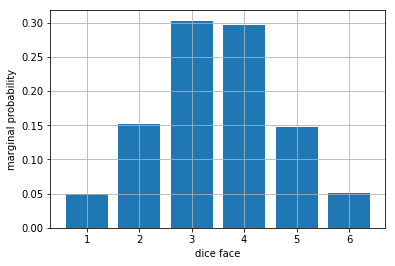

In [0]:
dice_values = [1,2,3,4,5,6]
dice_marginal_probabilities = [calc_discrete_marginal_prob(f, 'd', v) for v in dice_values]
plt.bar(dice_values,dice_marginal_probabilities)
plt.xlabel('dice face')
plt.ylabel('marginal probability')
plt.grid()

### Probability Density Function<a name='density_function' />

A continous probability density function (PDF) must satisfy the following condition:

$$
\int\limits_{-\infty}^{\infty}p(x)\mathrm{d}x = 1
$$

In this example the PDF is defined by the Normal distribution

$$
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\Big(-\frac{(x-\mu)^2}{2\sigma^2}\Big)}
$$

where $\mu$ is the mean and $\sigma^2$ is the variance

<a href=#objectives> [go to top] </a>

In [0]:
# Plotting a probability density function and a cumulative density function

import scipy.stats as stats
import math

mu = 0
variance = 0.112 # For low variance the PDF gets 'peaky'
sigma = math.sqrt(variance)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pdf = stats.norm.pdf(x, mu, sigma)
cdf = stats.norm.cdf(x, mu, sigma)
plt.plot(x, pdf, label='pdf')
plt.plot(x, cdf, label='cdf')
plt.xlabel('x')
plt.ylabel('probability density function')
plt.legend()
plt.grid()
plt.show()

print(pdf(0.0,mu,sigma))

NameError: ignored

Answer the following questions using the plot shown above:


1.   What is the probability of $x$ having the exact value of 0.0?
2.   What is the probability of $x$ being in the range $-0.0005 \leq x \leq 0.0005$?
3.   What is the probability of $x$ being less than 0.25?



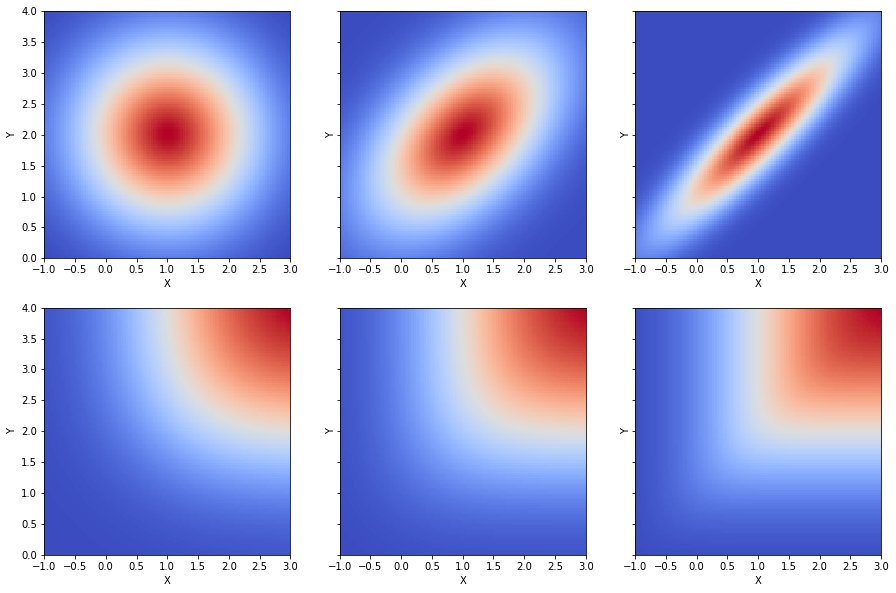

In [0]:
# Plotting a probability density function for 2 variables

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib import cm

x = np.linspace(-1, 3, 100)
y = np.linspace(0, 4, 100)

X, Y = np.meshgrid(x, y)

pos = np.dstack((X, Y))
mu = np.array([1, 2])
cov1 = np.array([[1.0, 0.0],[0.0, 1.0]])  # X,Y are independent
cov2 = np.array([[1.0, .5],[.5, 1.0]])  # Dependent
cov3 = np.array([[1.0, 0.9],[0.9, 1.0]])  # Highly dependent

rv1 = multivariate_normal(mu, cov1)
rv2 = multivariate_normal(mu, cov2)
rv3 = multivariate_normal(mu, cov3)

# Probability densities
Z1 = rv1.pdf(pos)
Z2 = rv2.pdf(pos)
Z3 = rv3.pdf(pos)

# Cumulative probabilities
C1 = rv1.cdf(pos)
C2 = rv2.cdf(pos)
C3 = rv3.cdf(pos)

fig, ax = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(15,10))

ax[0][0].pcolormesh(X, Y, Z1, cmap=cm.coolwarm)
ax[0][1].pcolormesh(X, Y, Z2, cmap=cm.coolwarm)
ax[0][2].pcolormesh(X, Y, Z3, cmap=cm.coolwarm)

ax[1][0].pcolormesh(X, Y, C1, cmap=cm.coolwarm)
ax[1][1].pcolormesh(X, Y, C2, cmap=cm.coolwarm)
ax[1][2].pcolormesh(X, Y, C3, cmap=cm.coolwarm)

for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel('X')
        ax[i][j].set_ylabel('Y')